In [1]:
# Author: Aryan Pandya
# Problem Statement: Open Innovation

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
df = pd.read_csv('satellite_orbit.csv')

# Remove null values
df = df.dropna()

# View top 5 Rows:
# df.head()

In [4]:
# To check no of rows and columns
# df.shape

In [3]:
# The Object_Id Column in Dataset is in String 
# But we want it for future use
# So we need to transform it (convert) into int/float 

# Ref 1: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Ref 2: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

Le = LabelEncoder()
df['SAT_ID'] = Le.fit_transform(df['OBJECT_ID'])

# A new Column SAT_ID is added to dataset

In [5]:
# Some Rows contains value which are either string or null(zeros) / no use. So we will drop them

df = df.drop(df.columns[[0, 1, 2, 9, 10, 16]], axis=1)

# Check Dimension of Dataset:
# df.shape

# Check top 5 Rows
# df.head()

In [6]:
# Prediction using 'Mean_Motion' of Satellites

x = df.drop(columns=['MEAN_MOTION'])
y = df['MEAN_MOTION']

In [7]:
# random_state: https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Why Random Forest Regressor: https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
# Mean Squared Error: 
# https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e 

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# The Low MSE, more better the prediction
# print(mse)

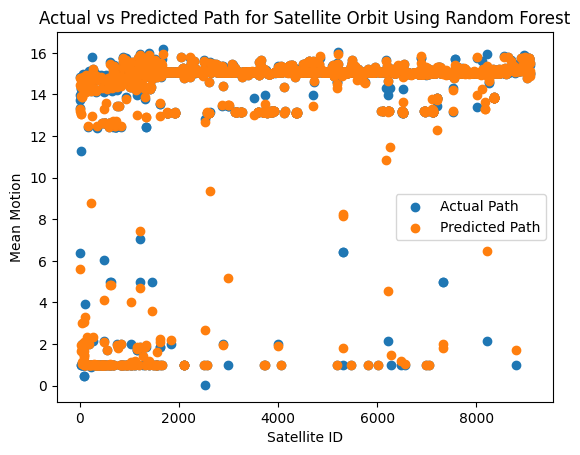

In [10]:
# Creating a Scatter Plot 
# https://medium.com/@row3no6/scatter-plot-visualization-and-relationship-in-python-39729bb0e4df
# https://www.kaggle.com/code/alexisbcook/scatter-plots
# https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

# The Dimension of X_test and y_test/y_pred are different. Solved by 'X_test.index'
plt.scatter([X_test.index], y_test, label='Actual Path')
plt.scatter([X_test.index], y_pred, label='Predicted Path')

plt.xlabel('Satellite ID')
plt.ylabel('Mean Motion')
plt.title('Actual vs Predicted Path for Satellite Orbit Using Random Forest')
plt.legend()
plt.show()

In [ ]:
# NOTE: We have more than 9000 rows (data) so its not possible to view them properly.
# I'm not sure of other methods as for now
# So What I will do is:
# i. Calculate the difference of actual vs predected path
# ii. Store and add it as new column to dataset

In [11]:
# Now we want the difference for Satellite path
orbit_change_diff = abs(y_pred - y_test)
df['test'] = orbit_change_diff

# Run NExt Step Now

# So new column test is added
# Look values in it
# NOTE: If the value is NaN that Means our model is perfect & actual value is same as predicted
# If it shows random value means there is difference in path
# The more big value means more difference in orbit path

In [12]:
# you can run this code and check last column added as 'test'
df.head()

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,SAT_ID,test
0,13.746771,0.002778,90.1972,51.6338,157.8025,264.3186,900,999,94643,0.000920,8.850000e-06,0,0.707992
1,13.527751,0.001799,90.2127,55.1051,354.0467,132.6594,902,999,73329,0.000099,7.400000e-07,1,NaN
2,9.893046,0.000487,32.1350,180.8629,65.6963,294.4042,1361,999,11963,-0.000988,1.000000e-08,2,NaN
3,13.334986,0.006813,89.9436,214.9242,283.0738,143.5962,1512,999,83883,0.000081,4.900000e-07,3,0.136801
4,13.360174,0.007014,89.9584,128.8841,147.9138,337.7682,1520,999,84128,0.000281,1.550000e-06,4,NaN


In [13]:
# Check top 5 rows
#df.head()

# check top and last 5 rows (data)
# df

In [ ]:
# ---------------------------------------------ADDITIONAL INFORMATION---------------------------------------

In [ ]:
# However this model does not guarentee 99% realiability
# This was just as basic model
# We have different column like inclination, mean_motion, arg_of_pericenter etc.
# Using which new algorithm can be formed and even there are chance we can find real time Location

# Conclusion: Many work coud be made on this model, applying different algorithms
# I would be happy to modify it in future and work on it..